In [1]:
import tensornetwork as tn
import numpy as np
import matplotlib.pyplot as plt

from tn_functions import *

### Algorithm breakdown:

In [2]:
np.random.seed(123456789)

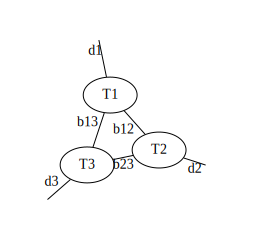

In [3]:
rank = 3
phys_dim = [12, 5, 5]
bond_dim = 1
bond_dim_ent = [12,1] 

params = [rank, phys_dim, bond_dim, bond_dim_ent]

np.random.seed(123456789)
mps = create_MPS(*params, plot = True)

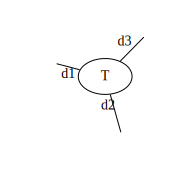

In [4]:
T = contract_T(mps,*params, plot = True)

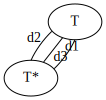

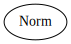

Norm of the tensor:  (1+0j)


In [5]:
norm_tensor_T = check_tensor_norm(T, plot = True)

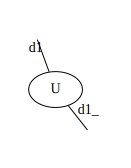

In [6]:
U = create_U(T, plot = True)
check_unitary_tensor(U)

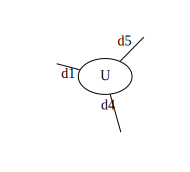

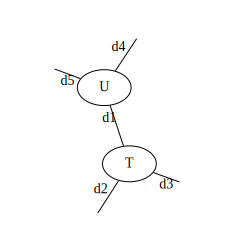

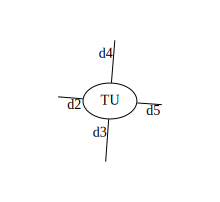

In [7]:
split_d4 = 12
split_d5 = 1
TU, _ = contraction_TU(T, U, split_d4, split_d5, plot = True)

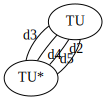

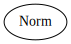

Norm of the tensor:  (1.0000000000000002+0j)


In [8]:
norm_tensor_TU = check_tensor_norm(TU, plot = True)

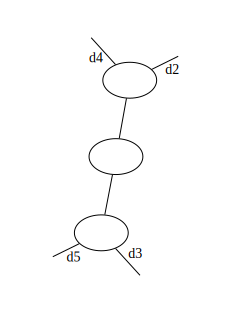

Entropy S =  0


In [9]:
U_svd, sing_val, V_svd_d, TU_copy = apply_SVD(TU, max_truncation_error = 0, plot = True)
s_values, S = entropy(sing_val, print_result = True)

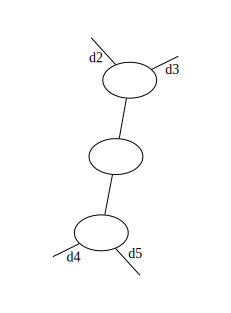

Entropy S =  1.204595958365111


In [10]:
U_svd, sing_val, V_svd_d, _ = apply_SVD_horizontal(TU, max_truncation_error = 0, plot = True)
s_values, S = entropy(sing_val, print_result = True)

### Results

In [11]:
np.random.seed(123456789)

In [12]:
mps_state_ = True
random = False

In [13]:
if mps_state_:
    rank = 3
    phys_dim = [100, 100, 100]
    bond_dim = 1
    bond_dim_ent = [50,1] 
    
    params = [rank, phys_dim, bond_dim, bond_dim_ent]
    
    mps = create_MPS(*params, plot = False)
    T = contract_T(mps,*params, plot = False)

In [14]:
if random:
    d1 = 50
    d2 = 5
    d3 = 5
    
    data = np.random.normal(size=(d1,d2,d3))
    data = normalization(data)
    T = tn.Node(data, name = 'T', axis_names = ['d1','d2','d3'])  # random tensor, not kron product
    n=check_tensor_norm(T)

In [15]:
entropy_values = find_entangled_systems(T)

Possible splitting combination:, 
 [(1, 100), (2, 50), (4, 25), (5, 20), (10, 10), (20, 5), (25, 4), (50, 2), (100, 1)]
d1-d2


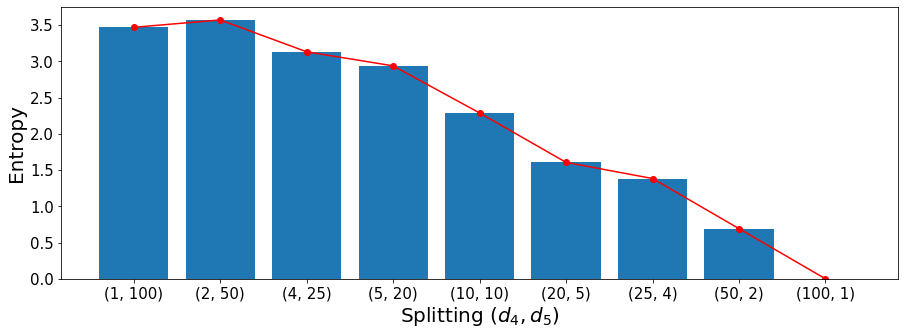

In [16]:
ent_val = [entropy_values[i][0] for i in range(len(entropy_values))]
comb = [str(pair) for pair in find_split(T.shape[0])]

fig = plt.figure(figsize=(15,5))
plt.bar(comb, ent_val)
plt.plot(ent_val, marker = 'o', color = 'red')
plt.xlabel(r"Splitting $(d_4,d_5)$", fontsize=20)
plt.ylabel("Entropy", fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

In [17]:
entropy_values

[(3.470656628340563, 3.4706566283405627),
 (3.572425742988826, 3.4706566283405627),
 (3.133111801279309, 3.4706566283405627),
 (2.938708809159042, 3.4706566283405627),
 (2.2890411770536474, 3.4706566283405627),
 (1.6068033160134685, 3.4706566283405627),
 (1.3839431371484952, 3.4706566283405627),
 (0.6925588702310481, 3.4706566283405627),
 (0, 3.4706566283405627)]